# MATH 405/607 

# Descent Methods

* Optimization problems
* Gradient Descent Scheme
* Newton's method for Optimization

### Literature 

* [Boyd and Vandenberghe, Convex Optimization, Chapter 9](https://web.stanford.edu/~boyd/cvxbook/)

In [3]:
include("math405.jl")

# Descent Methods #
## Motivation: Unconstrained minimization problems ##
Solving:
$$
\min f(x)
$$
Where $f: \Re^n \rightarrow \Re$. and f is continuously differentiable and has a minimum at the point $x^+$. To make our analysis easier (and ensure there is a minima), for this presentation we will also assume $f$ is **convex**.  

![GradientDescenturl](https://blog.paperspace.com/content/images/2018/05/68747470733a2f2f707669676965722e6769746875622e696f2f6d656469612f696d672f70617274312f6772616469656e745f64657363656e742e676966.gif)

### Convex functions ###
A function $f$ is convex on an interval $x \in [x_1,x_2]$ if:
$$
f(tx_1+(t-1)x_2) \leq tf(x_1) + (1-t)f(x_2)
$$
for all $t \in [0,1]$ and any two points on the interval.

<div>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c7/ConvexFunction.svg/1024px-ConvexFunction.svg.png" width="600"/>
</div>
<em>Source: Wikipedia "Convex Functions"</em>

**In other words:** Draw a line through any two points on an interval and the function will be under the line between the two points except at the intersections of the line and the function.

### Consequenses of Convexity ###
  
If a function is convex then the global minimum will be at the point $x^+$ such that:
$$
\nabla f(x^+) = 0
$$
and the hessian matrix $\nabla^2f(x)$ is positive semi-definite. An example of an important/useful functions that are convex are norms.

### Strong Convexity ###

If a function is strongly convex then:
$$
MI\succeq\nabla^2f(x)\succeq mI
$$
$m,M > 0$. In 1 dimension this is equivalent to saying $M\geq f''(x) \geq m$.

##  Solving minimization problems: An intuitive approach ##
Lets say we have some function $f: \Re^2 \rightarrow \Re$ that we want to find the minimum of numerically, and we can differentiate the function at any point at least once.
  
An intuitive pseudocode algorithm we could use would be as follows:  

1. Starting at $x_0$, find the direction $\Delta x$ which we can "move" from $x_0$ to decrease some norm of $f$ which acts as our distance to the minima
2. "Move" in that direction for "a while"
3. Repeat steps 1 and 2 until we reach the minima

This algorithm describes a generic **descent method**.  

The direction $\Delta x$ defines a line in $\Re^2$ that we will move along.
<div>
<img src="steepestDescentSearchSlice.PNG" width="1000"/>
</div>

Once we have a descent direction our problem becomes a **searching problem** as we will want to find the point at which we'd like stop at.

## Stopping conditions for Descent Method iteration steps ##
Two commonly used searches are the **Exact Line search** and **Backtracking search**

<div>
<img src="steepestDescentSearch.PNG" width="1000"/>
</div>

### Exact Line search ###
Evaluate:
$$
\arg \min_t f(x_0 + t\Delta x)
$$
Or in $\Re^2$, find the spot on the line defined by $x + t\Delta x$ does the function reach a minima? This search method is **exact**. However, numerically this search method can be computationally depending on $f(x)$.

### Backtracking search ###
**Big idea:** Approximately minimize $f(x)$ along $\Delta x$
Start at $t_0 = 1$ and iterate $t_{n+1} = \beta t_n$ until:
$$
f(x_0 +t_n\Delta x) \leq f(x_0) + \alpha \nabla f(x_0) \cdot \Delta x
$$
Where $\alpha \in [0,0.5]$ and $\beta \in [0,1]$. This method is **inexact** but is useful for computation when it is costly to compute $f(x)$. Iterations of the descent method using backtracking converges on the minimum point slower than if using an exact search (fewer steps) but may execute faster if $f(x)$ is a costly operation.

<div>
<img src="backtrack.PNG" width="1000"/>
</div>

<div>
<img src="steepestDescentSearch.PNG" width="1200"/>
</div>

## How do we determine the direction of steepest descent? ##
The intuitive option would be to move in the direction of the **negative gradient** of $f$ (the function we are minimizing):  
$$
\Delta x = - \nabla f(x)
$$

This would ensure that at each iteration we are always minimizing the distance between the minimized point $||f(x^+) - f(x_n)||_2$ at the maximal rate.
<div>
<img src="steepestDescentSearchShowingGrad.png" width="800"/>
</div>

## Are there other directions to descend? ##
Yes! It depends on the norm we are using to calculate our "distance" to the minima
1. Euclidan norm $||x||_2: -\nabla f(x)$  
2. $\textit{l}_1$-norm: $-(\partial f(x)/\partial(x_i))e_i$ where $|(\partial f(x)/\partial(x_i))| = ||\nabla f(x)||_\infty$  
3. $\textit{l}_{\infty}$-norm: $(-\partial f(x)/\partial(x_i))e_i$ where $x_i = ||f(x)_i||_\infty$  

The norm representing how "far away" we are from our minima dictates the direction we choose to follow.

## Is this the best we can do? ##
So far we have been only using 1st derivative information. What if we used higher order information as well?
#### Newton's method for optimization ####
Instead of using 1st derivative information to decide our step direction we can descend using the direction:
$$
\Delta x = -\nabla^2 f(x)^{-1} \nabla f(x)
$$
This gives the steepest descent direction to minimize the **Hessian norm** which is the matrix norm of the hessian matrix (contains all the 2nd order partials).  
We will show that this converges faster in a moment. But once again, if the Hessian matrix cannot be computed or is costly to compute (and compute its inverse) this method may execute slower.

<div>
<img src="newton_vs_grad.png" width="600"/>
</div>

Red shows Newton Step, green shows gradient descent (both with exact searches)  

### Example:
Finding the minimum of $f(x, y) = cos(x) + sin(y)$ within $x \in [-2, 4]$ and $y \in [0, 6]$

In [1]:
f(x) = cos(x[1]) + sin(x[2]) #For working with the ForwardDiff library
g(x,y) = cos(x) + sin(y) #For plotting convenience

gradf(x) = ForwardDiff.gradient(f, x)
hessf(x) = ForwardDiff.hessian(f, x)

h0 = 0.3 # Initial choice of step size h
tolerance = 1e-4;

### Newton's Method:

In [1]:
using Plots;
guessX = 2
guessY = 0.1
h = h0
x = zeros(2)
x[1] = guessX
x[2] = guessY;
iterx = [x[1]] ;itery = [x[2]]; iterf = [f(x)]
x0=range(0,stop=6,length=200)
y0=range(-4,stop=2,length=200)
# p = plot(f, 0.0, 2*pi, lw=3, grid=:xy, size=(600,300), label = "f(x)")
p = plot(x0,y0,g,st=:surface,camera=(10,30), c=:bwr, size=(800,500))

newx = zeros(2)

while(true)
    old_x = x[1]
    old_y = x[2]
    newx[1], newx[2] = [x[1], x[2]] - h * inv(hessf(x)) * gradf(x)
#--------See if we need to adjust h as we approaches the optimum--------#
    while f(newx) >= f(x) #backtracking line search
        h = 2h/3
        newx[1], newx[2] = [x[1], x[2]] - h * inv(hessf(x)) * gradf(x)
    end

#---------------------------Advancing----------------------#
    x[1], x[2] = newx[1], newx[2] ; push!(iterx, x[1]) ; push!(itery, x[2]) ; push!(iterf, f(x))

#---------------------------Check convergence----------------------#
    if abs((old_x - x[1])^2 + (old_y - x[2])^2) <= tolerance
        break
    end
end

scatter!(iterx, itery, iterf, ms=3, color=:yellow, label = "Newton's method")

p

LoadError: UndefVarError: h0 not defined

### Gradient Descent:

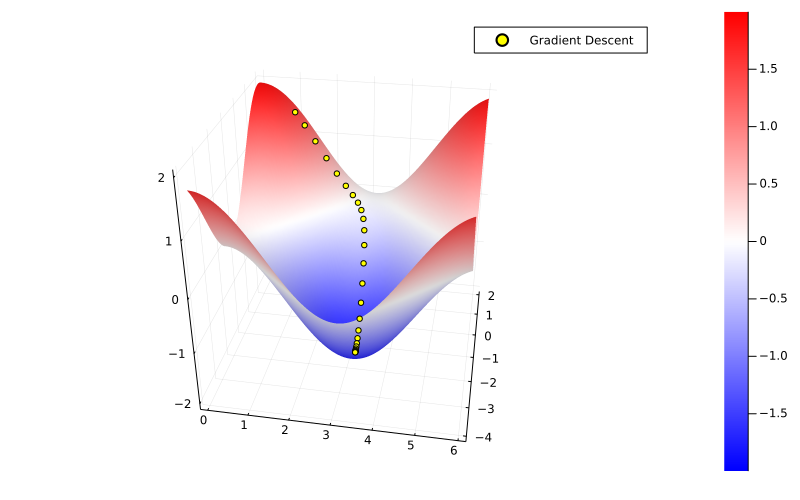

In [5]:
guessX = 1
guessY = 1.5
h = h0
x = zeros(2)
x[1] = guessX
x[2] = guessY;
iterx = [x[1]] ;itery = [x[2]]; iterf = [f(x)]
x0=range(0,stop=6,length=200)
y0=range(-4,stop=2,length=200)
# p = plot(f, 0.0, 2*pi, lw=3, grid=:xy, size=(600,300), label = "f(x)")
p = plot(x0,y0,g,st=:surface,camera=(10,30), c=:bwr, size=(800,500))
newx = zeros(2)

while(true)
    old_x = x[1]
    old_y = x[2]
    
#--------See if we need to adjust h as we approaches the optimum--------#
    newx[1], newx[2] = [x[1], x[2]] - h * gradf(x)
    while f(newx) >= f(x) #backtracking line search
        h = 2h/3
        newx[1], newx[2] = [x[1], x[2]] - h * gradf(x)
    end
#---------------------------Advancing----------------------#
    x[1], x[2] = newx[1], newx[2] ; push!(iterx, x[1]) ; push!(itery, x[2]) ; push!(iterf, f(x))
    
#---------------------------Check convergence----------------------#
    if abs((old_x - x[1])^2 + (old_y - x[2])^2) <= tolerance
        break
    end
    
end

scatter!(iterx, itery, iterf, ms=3, color=:yellow, label = "Gradient Descent")

p

### Advantages with Newton's method for optimization ###  
1. Faster convergance than gradient descent  

### Issues with Newton's method for optimization ###  
1. The Hessian matrix must be invertible (Used to calculate the descent direction)
2. Can converge to a saddle point in $\Re^n, n \geq 2$
3. Like the Newton method for root finding, it may not converge and instead oscillate between points
4. Higher computational complexity (second order derivatives)

### Advantage of the Gradient Descent ###
1. Resilient to not so "nice" functions (Whose higher order derivatives do not exist or have unwanted zeros)
2. Moderate computation complexity (Requires only first order derivative)
3. Consistent convergence rate & Globally convergent

### Issue with Gradient Descent ###
1. Slower convergance than Newton

## Convergence Analysis for Gradient Descent ##

**Implications of strong convexity**

Assume f is strongly convex on S, so that there exists $m,M$ such that $mI \leq \nabla^2 f(x) \leq MI$ for all $x \in S$.

This also means that for $x,y \in S$, we have:

$f(y) = f(x) + \nabla f(x)^T(y-x) + \frac{1}2 (y-x)^T \nabla^2 f(z) (y-x)$ for some z on the line segment between x and y.

Plugging in the first inequality, we get for all $x,y \in S$:

$f(y) \geq f(x) + \nabla f(x)^T(y-x) + \frac{m}2 ||y-x||_2^2$ (1)
and similarly
$f(y) \leq f(x) + \nabla f(x)^T(y-x) + \frac{M}2 ||y-x||_2^2$ (2)

Let $p^*$ be the minimum value of $f$, and we will show that $f-p^*$ is bounded. 

Setting the gradient of y to 0 (simple, omitted, calculus stuff), we can minimize the right hand side of (1) with $\widetilde{y} = x - \frac{1}m \nabla f(x)$, such that:

$f(y) \geq f(x) + \nabla f(x)^T(y-x) + \frac{m}2 ||y-x||_2^2$

$\ \ \ \ \ \ \ \geq f(x) + \nabla f(x)^T(\widetilde{y}-x) + \frac{m}2 ||\widetilde{y}-x||_2^2$ 

$\ \ \ \ \ \ \ \geq f(x) - \frac{1}{2m} ||\nabla f(x)||_2^2$ (just trust)

This this holds for all $y \in S$, we have:

$\frac{1}{2m} ||\nabla f(x)||_2^2 \geq f(x) - p^*$ (3)

Now, back to the gradient descent:
Define $g: \Re \to \Re$, $g(t) = f(x - t\nabla f(x))$, a function of the step length t in the negative gradient direction. Plugging in $y = x - t\nabla f(x)$ above gets us a quadratic bound on g:

$f(x - t\nabla f(x)) = g(t) \leq f(x) + t||\nabla f(x)||_2^2 + \frac{Mt^2}2 ||\nabla f(x)||_2^2$ (4)

**Analysis for exact line search**

Let $x^+ = x - t\nabla f(x)$. Minimize both sides of the previous inequality:

Let $t_{actual}$ be the step length that minimizes $g(t)$. and the right hand side be minimized by $t=1/M$, with a min value of $f(x) - \frac{1}{2M} ||\nabla f(x)||_2^2$. So, we get:

$f(x^+) = g(t_{actual}) \leq f(x) - \frac{1}{2M} ||\nabla f(x)||_2^2$

Let $p^*$ be the minimum value of $f$, and subtract it from both sides.

$f(x^+) - p^* \leq f(x) - p^* - \frac{1}{2M} ||\nabla f(x)||_2^2$

From (3), $||\nabla f(x)||_2^2 \geq 2m(f(x) - p^*)$, we get:

$f(x^+) - p^* \leq (1- \frac{m}{M})(f(x) - p^*)$

Let $c = 1- \frac{m}{M} \leq 1$, and apply the inequality above recursively, we get that:

$f(x^{(k)}) - p^* \leq c^{(k)}(f(x^{(0)}) - p^*)$

Since as $k \to \infty$, $c^{(k)}(f(x^{(0)}) - p^*) \to 0$, we see that $f(x^{(k)})$ converges to $p^*$, the minimum value of $f$. 

The $c^k$ term also indicates that the rate of convergence is at least as fast as a geometric series.

In particular, we will have $f(x^{(k)}) - p^* < \epsilon$ after at most $\frac{log(\frac{(f(x^{(0)}) - p^*)}{\epsilon})}{log(\frac{1}{c})}$

**Analysis for backtracking line search**

We will show that the exit condition:

$g(t) = f(x - t\nabla f(x)) \leq f(x) - \alpha t ||\nabla f(x)||_2^2$,

is satisfied when $0 < t < \frac{1}{M}$ (Note: this implies $-t + \frac{Mt^2}2 \leq -\frac{t}2$)

From (4):

$g(t) \leq f(x) + t||\nabla f(x)||_2^2 + \frac{Mt^2}2 ||\nabla f(x)||_2^2$

$\ \ \ \ \ \ \leq f(x) - \frac{t}{2}||\nabla f(x)||_2^2$

$\ \ \ \ \ \ \leq f(x) - \alpha t||\nabla f(x)||_2^2$, since $\alpha < \frac{1}2$

Therefore, the backtracking line search terminates either with $t = 1$ or with a value $t \geq \frac{\beta}M$. This provides a lower bound on the decrease in the objective function. Using this fact we can show that:
$$
f(x^+) \leq f(x) -\min\{\alpha, \alpha \beta/M\}||\nabla f(x)||^2_2\\
f(x^+) -p^* \leq f(x) -\min\{\alpha, \alpha \beta/M\}||\nabla f(x)||^2_2-p^* \\
$$
using the properties of strongly convex functions $||\nabla f(x)||^2_2 \geq 2m(f(x) -p^*)$:
$$
f(x^+) -p^* \leq (1 -\min\{2m\alpha, 2m\alpha \beta/M\})(f(x)-p^*) \\
$$
So:
$$
f(x^{(k)}) - p^* \leq c^k(f(x^{(0)})-p^*)\\
c = 1- \min\{2m\alpha, 2\alpha \beta m/M\} \leq 1
$$
Therefore, $f(x^{(k)})$ converges to $p^*$ at least as fast as a geometric series.

## Convergence Analysis for Newton's Method for optimization ##


Assumptions: f twice differentiable, strongly convex

(Reminder: strongly convex: $\nabla^2 f(x) \leq MI$ for all $x \in S$)

But ALSO: The Hessian of f is Lipschitz continuous on S with constant L, i.e.

$||\nabla^2 f(x) - \nabla^2 f(y)||_2 \leq L||x-y||_2$, for any $x,y \in S$

Intuitively, L measures how well f can be represented as a quadratic function, and so can be taken as 0 for quadratic functions. Intuition also suggests that Newton's method would work very well on functions with small L (quadratic-like functions). 

Outline of proof (because the details contain even more math than we had previously):

The proof shows that there exists $0 \leq \eta \leq \frac{m^2}L$ and $\gamma > 0$ such that the following two equations hold (this part is omitted):

If $||f(x^{(k)})||_2 \geq \eta$, then 

$f(x^{(k+1)}) - f(x^{(k)}) \leq -\gamma$

If $||f(x^{(k)})||_2 \leq \eta$, then backtracking line search selects $t^{(k)} = 1$ and

$\frac{L}{2m^2} ||\nabla f(x^{(k+1)})||_2 \leq (\frac{L}{2m^2}||\nabla f(x^{(k+1)})||)^2$

Now let's focus on this case: ^

Suppose that the second implication is satisfied at iteration $k$ ($||f(x^{(k)})||_2 \leq \eta$). Since $\eta < \frac{m^2}L$, then $||f(x^{(k+1)})||_2 \leq \eta$ as well. Recursively, this means that the second implication is held for iteration $k+1$ and all future iterations. Aka, for $l > k$, $||f(x^{(l)})||_2 \leq \eta$.

So, for all $l > k$, the algorithm takes a Newton step $t = 1$, and

$\frac{L}{2m^2}||f(x^{(l+1)})||_2 \leq (\frac{L}{2m^2}||\nabla f(x^{(l)})||)^2$

Applying this recursively:

$\frac{L}{2m^2}||f(x^{(l)})||_2 \leq (\frac{L}{2m^2}||\nabla f(x^{(k)})||)^{2^{l-k}} \leq (\frac{1}{2})^{2^{l-k}}$

And finally:

$f(x^{(l)}) - p^* \leq \frac{1}{2m}||f(x^{(l)})||_2^2 \leq \frac{2m^3}{L^2}(\frac{1}{2})^{2^{l-k}}$

Whew

The last inequality shows that the convergence is really fast once the second condition is fulfilled, and the rate of convergence is quadratic.

Now, we can understand why the Newton method is split into two parts, the second condition, unsurprisingly, is called the quadratically convergent stage (and backtracking selects timestep $t = 1$ every time). The first condtion is known as the damped Newton phase, and the algorithm can choose a timestep $t<1$.

Finally, the total complexity:

Let $\epsilon_0 = \frac{2m^3}{L^2}$. The number of iterations until $f(x) - p^* < \epsilon$ is bounded above by $\frac{f(x^{(0)}) - p^*}{\gamma} + log_2log_2(\frac{\epsilon_0}{\epsilon})$

## Summary of Convergence analyses
### Gradient Descent
**Assumptions**: $f$ is strongly convex ($mI \leq \nabla^2 f(x) \leq MI, m,M > 0$) on $S$ and twice differentiable
#### Exact line search
**Result**:The number of iterations until $f(x) - p^* < \epsilon$ is bounded above by:
$$
\frac{log(f(x^{(0)}) - p^*)- log(\epsilon)}{log(c^{-1})}
$$
with
$$
c = 1- \frac{m}{M} \leq 1
$$
Converges as a geometric series.
#### Backtracking line search
**Algorithm parameters**: $\alpha \in [0, 0.5], \beta \in [0,1]$  
**Result**:The number of iterations until $f(x) - p^* < \epsilon$ is bounded above by:
$$
\frac{log(f(x^{(0)}) - p^*)- log(\epsilon)}{log(c^{-1})}
$$
with
$$
c = 1- \min\{2m\alpha, 2\alpha \beta m/M\} \leq 1
$$
Also converges geometrically, but with a larger constant than the exact search.

### Newton
**Assumptions**: $f$ is strongly convex ($mI \leq \nabla^2 f(x) \leq MI, m,M > 0$) on $S$ and twice differentiable, and the Hessian of $f$ is Libschitz continuous with constant L  
**Result**:The number of iterations until $f(x) - p^* < \epsilon$ is bounded above by:
$$
\frac{f(x^{(0)}) - p^*}{\gamma} + log_2log_2(\frac{\epsilon_0}{\epsilon})\\
$$
With
$$
\epsilon_0 = \frac{2m^3}{L^2}\\
f(x^{(k+1)}) - f(x^{(k)}) \leq -\gamma
$$

Test Cell adam is gonna put notes in

https://web.stanford.edu/~boyd/cvxbook/bv_cvxbook.pdf 477-498 are good  
https://web.stanford.edu/~boyd/cvxbook/bv_cvxslides.pdf  
https://www.osti.gov/servlets/purl/983240/  
https://www.cs.ubc.ca/~schmidtm/Courses/540-W18/L4.pdf  
https://www.math.usm.edu/lambers/mat419/lecture10.pdf  
https://people.seas.harvard.edu/~yaron/AM221-S16/lecture_notes/AM221_lecture10.pdf  
https://en.wikipedia.org/wiki/Newton%27s_method_in_optimization  
https://en.wikipedia.org/wiki/Hessian_matrix  
https://en.wikipedia.org/wiki/Convex_function  
https://www.cs.ubc.ca/~schmidtm/Courses/Notes/norms.pdf  

**Gradient descent**:https://en.wikipedia.org/wiki/Gradient_descent  
    descend along the negative gradient of a function to find a local minima.  
        requires the function to be differentiable.  
    inverse is gradient ascent (finding maxima)
   
**Coordinate descent**:https://en.wikipedia.org/wiki/Coordinate_descent  
    iteratively move along coordinate directions to find a local minima of a function  
        does not require differentiability (big plus)  

**Conjugate gradient descent**:https://en.wikipedia.org/wiki/Conjugate_gradient_method  


**Adaptive coordinate descent**:https://en.wikipedia.org/wiki/Adaptive_coordinate_descent  